# IMPORT LIBRARIES AND DATASETS

In [1]:
#uncomment and install if you haven't already

#! pip install jupyterthemes
#! pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import string

import nltk # Natural Language tool kit 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, classification_report
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# Load the data
tweets_df = pd.read_csv('twitter.csv')

In [4]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [8]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

# PERFORM DATA EXPLORATION 

<AxesSubplot:>

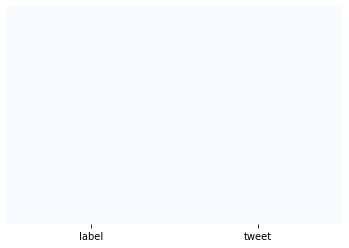

In [9]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

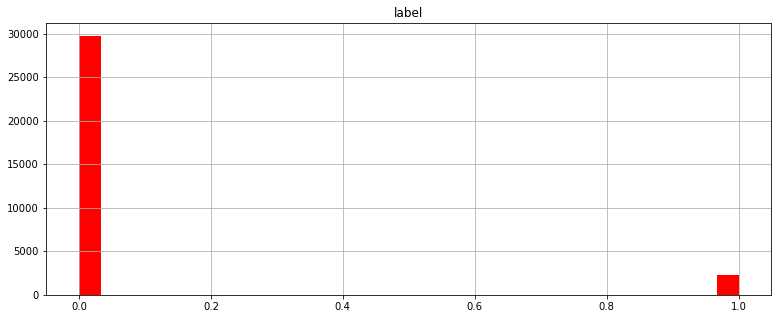

In [10]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

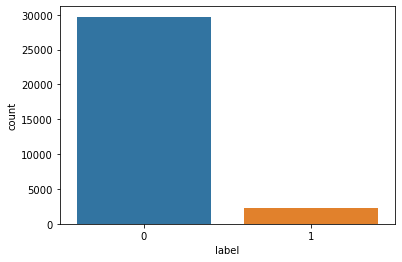

In [11]:
sns.countplot(tweets_df['label'], label = "Count") 

In [12]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [13]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


In [14]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [15]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

In [16]:
# Let's view the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

<AxesSubplot:ylabel='Frequency'>

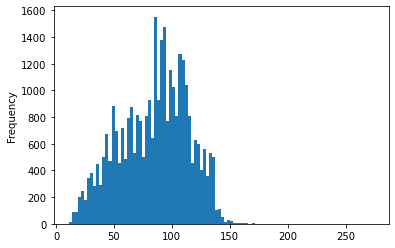

In [17]:
# Plot the histogram of the length column
tweets_df['length'].plot(bins=100, kind='hist') 

# PLOT THE WORDCLOUD

In [18]:
positive_tweet = tweets_df[tweets_df['label']==0]
positive_tweet

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [19]:
negative_tweet = tweets_df[tweets_df['label']==1]
negative_tweet

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [20]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [21]:
sentences_as_one_string =" ".join(sentences)

In [22]:
#sentences_as_one_string

# Plot wordcloud

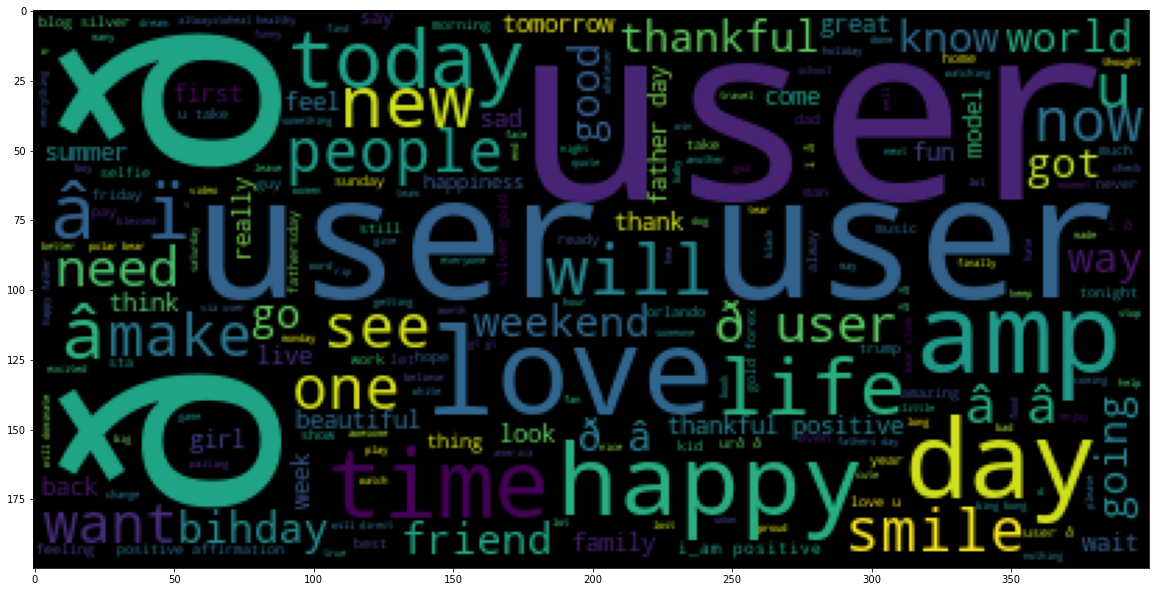

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

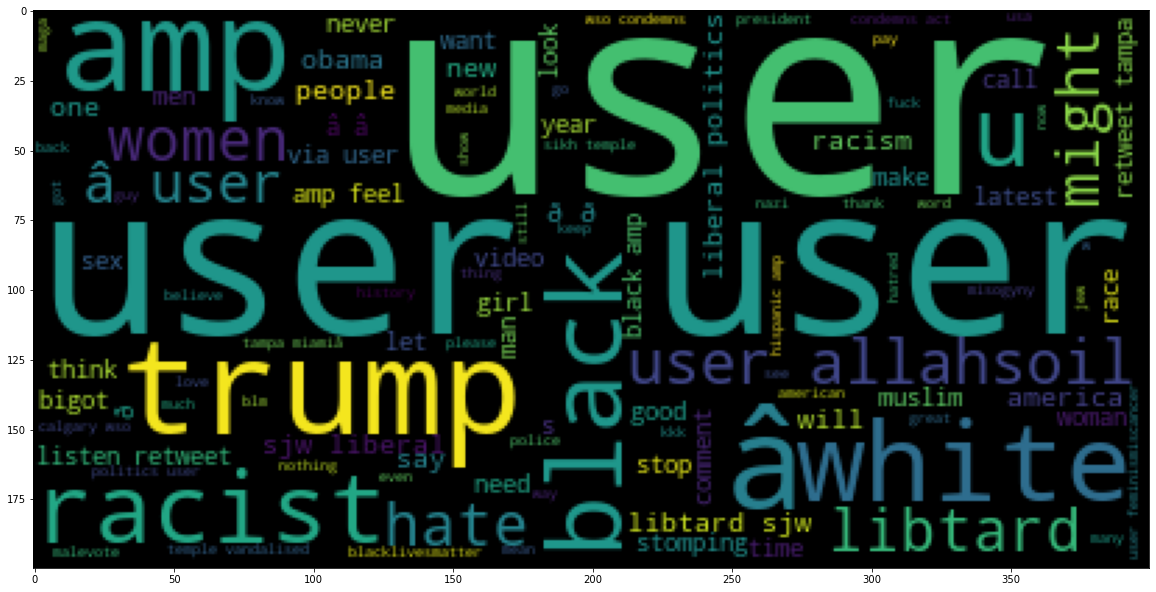

In [24]:
#plot wordcloud for negative tweets

negative_list = negative_tweet['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
Test = '$I love AI & Machine learning!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI  Machine learning'

In [27]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [28]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'A',
 'I']

In [29]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# PERFORM DATA CLEANING - REMOVE STOPWORDS

In [30]:
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maryp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [32]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [33]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

# PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [34]:
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [35]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


c:\Users\maryp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [37]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

# mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())



[[1 1]
 [2 1]
 [1 3]]


# CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [38]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [39]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [40]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [41]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [42]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [43]:
#print(vectorizer.get_feature_names())

In [44]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
tweets_countvectorizer.shape

(31962, 47386)

In [46]:
X = pd.DataFrame(tweets_countvectorizer.toarray())


In [47]:
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y = tweets_df['label']

# TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER MODEL

In [49]:
X.shape

(31962, 47386)

In [50]:
y.shape

(31962,)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5945
           1       0.57      0.53      0.55       448

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



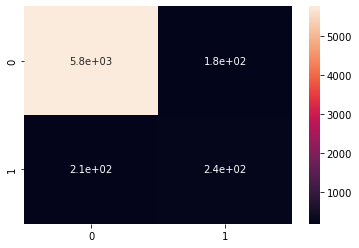

In [52]:
# multinomial naive bayes is mostly used in Natural Language Processing (NLP)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

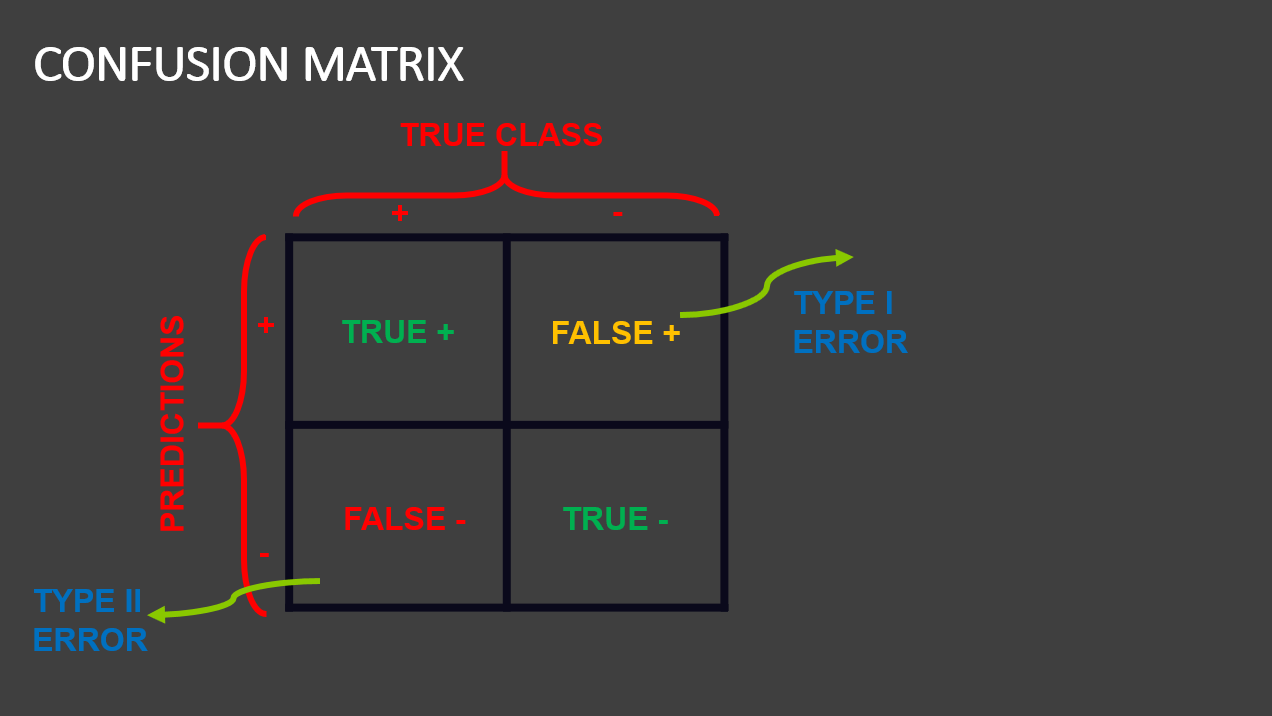

In [53]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5945
           1       0.57      0.53      0.55       448

    accuracy                           0.94      6393
   macro avg       0.77      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



Logistic Regression

In [54]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)
y_predict_test = LR_classifier(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

c:\Users\maryp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: 'LogisticRegression' object is not callable

XGBoost

In [ ]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train)
y_predict_test = XGB_classifier(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

# Applying Imbalance learn to balance the skewed class distribution

In [ ]:
# Undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Oversampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_test)

Multinomial Naive Bayes

In [ ]:
# fit NB_classifier to undersampled data
NB_classifier.fit(X_rus, y_rus)
y_predict_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

In [ ]:
# fit NB_classifier to oversampled data
NB_classifier.fit(X_ros, y_ros)
y_predict_test = NB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

Logistic Regression

In [ ]:
# fit LR_classifier to undersampled data

LR_classifier.fit(X_rus, y_rus)
y_predict_test = LR_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

In [ ]:
# fit LR_classifier to oversampled data

LR_classifier.fit(X_ros, y_ros)
y_predict_test = LR_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

XGBoost

In [ ]:
# fit XGB_classifier to undersampled data

XGB_classifier.fit(X_rus, y_rus)
y_predict_test = XGB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test,y_predict_test))

In [ ]:
# fit XGB_classifier to oversampled data

XGB_classifier.fit(X_ros, y_ros)
y_predict_test = XGB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test,y_predict_test))